In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/domaindocument/domainDocument.xlsx
/kaggle/input/new-iphone11review/iphone11_review.csv


In [2]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9 MB 2.8 MB/s 


In [3]:
#basic
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import csv

# Importing library
#nltk.download()
import sys
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize, sent_tokenize 
from nltk.book import *
from nltk.stem import *
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
import string
import random
import spacy
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

from textblob import TextBlob
from spellchecker import SpellChecker

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Part 1: Domain Specific Dataset Analysis

## Initialize variable

In [4]:
pd.set_option('display.max_colwidth', None)
TopicDomain = ["Data Science", "Streaming Services","History of Singapore"]
dataDict = {}
dataDict["Data Science"] = ''
dataDict["Streaming Services"] = ''
dataDict["History of Singapore"] = ''
dataDictPD = {}
dataDictPD["Data Science"] = ''
dataDictPD["Streaming Services"] = ''
dataDictPD["History of Singapore"] = ''

## Process all the document links in excel file

### Dataset that is going to be used in general

1.	**Data Science** is a field that uses various tools, processes, algorithms and machine learning principles to obtain knowledge and insights patterns from data. 
2.	**Streaming Services** is a subscription-based service that offers online streaming of movies and television programs
3.	**History** of Singapore

In [5]:
data = pd.read_excel("../input/domaindocument/domainDocument.xlsx")
for tpd in TopicDomain:
    i = 0
    for url in data[tpd]:
        text = ''
        print(str(i) + ". "+url)
        req = Request(url,headers = {"User-Agent": "Mozilla/5.0"})
        html = urlopen(req).read()
        soup = BeautifulSoup(html, features="html.parser")
        if (tpd=='Data Science'):
            para = soup.find_all('pre')
            for p in para:
                text = p.getText()
                lines = (line.strip() for line in text.splitlines())
                # break multi-headlines into a line each
                chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
                # drop blank lines
                text = '\n'.join(chunk for chunk in chunks if chunk)
                dataDict[tpd] = dataDict[tpd] + ' ' + text.replace('\n', '. ')
        for script in soup.find_all('span'):
            script.extract()
        para = soup.find_all('p')
        for p in para:
            s = p.getText()
            slices = []
            for match in re.finditer('\w\.\w', s):
                slices.append(match.start()+2)
            slices.append(len(s))
            offset = 0
            subsentences = ""
            for pos in sorted(slices):
                subsent = s[offset:pos]
                offset += len(subsent)
                subsentences = subsentences + " "+ subsent
            #print(subsentences)
            text = text +' ' + subsentences
        # break into lines and remove leading and trailing space on each
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)
        dataDict[tpd] = dataDict[tpd] + ' ' + text
        i = i+1
        if i ==20 :
            break

0. https://www.thoughtworks.com/insights/blog/coding-habits-data-scientists
1. https://www.edureka.co/blog/what-is-data-science/
2. https://www.cio.com/article/3263790/the-essential-skills-and-traits-of-an-expert-data-scientist.html
3. https://www.oracle.com/sg/data-science/what-is-data-science.html
4. https://www.forbes.com/sites/forbestechcouncil/2019/02/20/empowering-the-citizen-data-scientist/#56b558594861
5. https://knowledge.wharton.upenn.edu/article/whats-driving-demand-data-scientist/
6. https://www.analyticsinsight.net/the-rise-of-data-data-science-big-data-and-data-analytics-for-seamless-business-operations/
7. https://www.forbes.com/sites/kenrickcai/2020/08/24/dataiku-ai-enablement-for-enterprises-startup-raises-100-million-series-d/#653af3b5d70e
8. https://hbr.org/2020/02/are-your-companys-leaders-and-data-scientists-on-the-same-page
9. https://www.businesstimes.com.sg/opinion/saving-the-environment-with-data-analytics
10. https://theconversation.com/data-science-could-help

## For each Topic Domain perform Stemming and Tokenizing

In the tokenization process, we will perform tokenization for all the text in our dataset. Tokenization are important as text needs to be split into smaller units such as words, punctuation, numbers before any processing can be done.
Table 1 shows that the tokenizer is unable to correctly recognized the domain specific tokens. The tokenizer performed tokenization by splitting the text based on word boundaries. The major drawback of this is the real-world object, such as a person name and organization will not classified as a single token. This can result in the token having different meaning then expected. An example from Table 1, the text “Acorn TV” is split into 2 tokens (Acorn and TV). However, the word “Acorn” by itself has a different meaning as compared to “Acorn TV”.

| Domain | Unexpected Tokens | Expected Tokens |
| -- | -- | -- |
| Data Science   | ' (' 'k−1' ') ' '×'  ' (' 'k−2'   ') '  |' (k−1) ' '×' ' (k−2) ' | 
| Streaming Services    | 'Acorn' 'TV', 'Amazon' 'Video'   |'Acorn TV' - is an American subscription video streaming service  ,'Amazon Video' - is an American Internet video owned by Amazon |
| History of Singapore   | 'M' 'Veerasany,'Nagajyothi' 'Mahendran', 'Bak' 'Kut' 'Teh' | 'M Veerasamy', 'South India', 'Nagajyothi Mahendran', 'Bak Kut Teh'


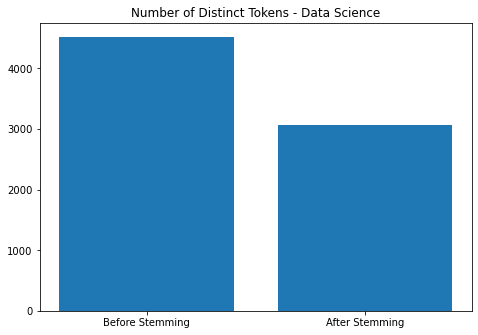

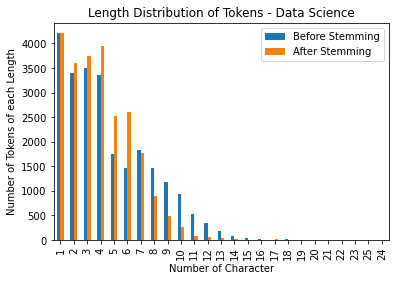

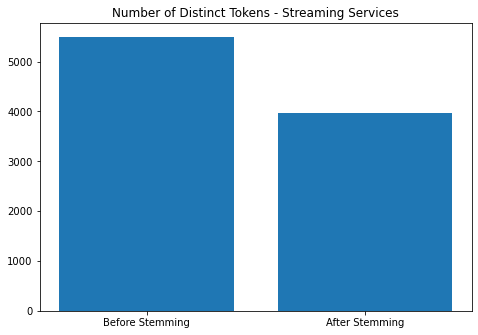

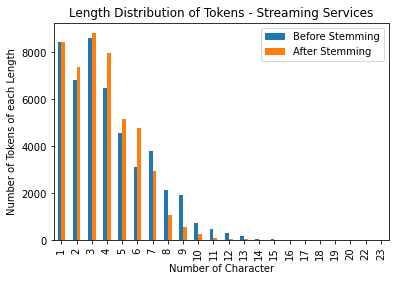

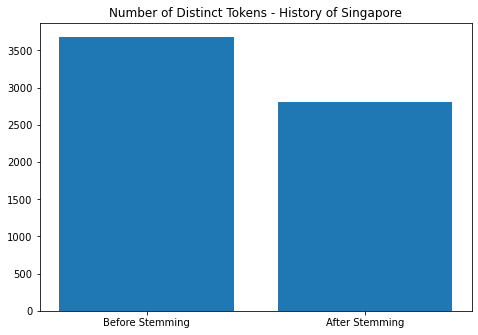

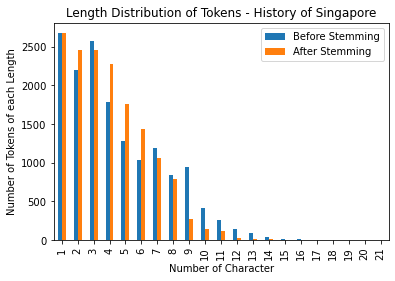

In [6]:
for tpd in TopicDomain:
    # token
    tokens = nltk.word_tokenize(dataDict[tpd])
    tokensArr = np.array(tokens)
    ## remove long link / may not need it
    index = []
    k = 0
    for t in tokensArr:
        if(len(t)>25):
            index.append(k)
        k = k +1
    tokensArr = np.delete(tokensArr, index)

    # stem
    stemmer = PorterStemmer()
    stem =[stemmer.stem(token) for token in tokensArr]
    stemsArr = np.array(stem)
        
    x = ['Before Stemming', "After Stemming"]
    y = [len(np.unique(tokensArr)),len(np.unique(stemsArr))]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    plt.title("Number of Distinct Tokens - "+tpd)
    plt.show()

    token_df = pd.DataFrame(data=tokensArr, columns=["Word"])
    token_df['Number of Character'] = token_df.apply(lambda row: len(row.Word), axis = 1) 
    token_df = token_df.groupby(['Number of Character']).size().reset_index(name='Before Stemming')
    
    stem_df = pd.DataFrame(data=stemsArr, columns=["Word"])
    stem_df['Number of Character'] = stem_df.apply(lambda row: len(row.Word), axis = 1) 
    stem_df = stem_df.groupby(['Number of Character']).size().reset_index(name='After Stemming')
    
    df_merge_col = pd.merge(token_df, stem_df, on='Number of Character' , how='outer')
    df_merge_col['Before Stemming'] = df_merge_col['Before Stemming'].fillna(0.0).astype(int)
    df_merge_col['After Stemming'] = df_merge_col['After Stemming'].fillna(0.0).astype(int)
    df_merge_col.plot(x="Number of Character", y=["Before Stemming", "After Stemming" ], kind="bar")
    plt.title("Length Distribution of Tokens - " + tpd)
    plt.ylabel("Number of Tokens of each Length")
    dataDictPD[tpd]=y

## Number of Distinct tokens for all 3 domain before and after stemming

Text(0.5, 0, 'Topical Domain')

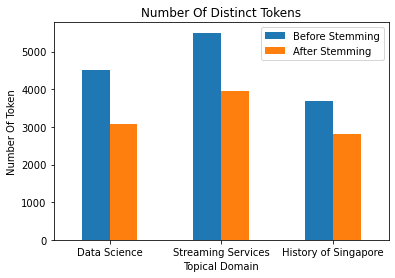

In [7]:
df_data = pd.DataFrame.from_dict(dataDictPD,orient='index')
df_data = df_data.rename(columns={0: "Before Stemming", 1: "After Stemming"})
df_data.plot(kind="bar",rot=0,title="Number Of Distinct Tokens" )
plt.ylabel('Number Of Token') 
plt.xlabel('Topical Domain')

## Sentence segmentation

The library we used for to perform sentence segmentation will be sent_tokenize from NLTK.
Figure 3 it shows that the distribution of the sentence length resembles a bell curve. The number of words in a sentence typically range around 15 to 25 words regardless of the topical domain. This suggest that when writing a sentences people tends to write around 20 words per sentences. This could be because longer sentences might be less readable while too many short sentences could create a clashing effect for the reader. 
Another important point to take note is there are sentences with around 100 words. This can be caused by sentences which does not have proper full stops.

Text(0.5, 1.0, 'Distribution Of The Sentence Length')

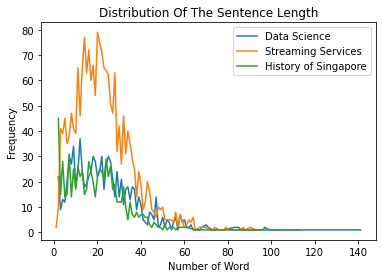

In [8]:
sentancesArr1 = sent_tokenize(dataDict["Data Science"] )
sentancesArr2 = sent_tokenize(dataDict["Streaming Services"] )
sentancesArr3 = sent_tokenize(dataDict["History of Singapore"]  )

sentances_df1 = pd.DataFrame(data=sentancesArr1, columns=["Sentences"])
sentances_df2 = pd.DataFrame(data=sentancesArr2, columns=["Sentences"])
sentances_df3 = pd.DataFrame(data=sentancesArr3, columns=["Sentences"])

sentances_df1['Number of Word'] = sentances_df1.apply(lambda row: len(nltk.word_tokenize((row.Sentences))) , axis = 1) 
sentances_df2['Number of Word'] = sentances_df2.apply(lambda row: len(nltk.word_tokenize((row.Sentences))) , axis = 1) 
sentances_df3['Number of Word'] = sentances_df3.apply(lambda row: len(nltk.word_tokenize((row.Sentences))) , axis = 1) 

sentances_df1 = sentances_df1.groupby(['Number of Word']).size().reset_index(name='Data Science')
sentances_df2 = sentances_df2.groupby(['Number of Word']).size().reset_index(name='Streaming Services')
sentances_df3 = sentances_df3.groupby(['Number of Word']).size().reset_index(name='History of Singapore')

sentances_df1 = sentances_df1[sentances_df1['Number of Word'] < 200]
sentances_df2 = sentances_df2[sentances_df2['Number of Word'] < 100]


ax = sentances_df1.plot(x="Number of Word" , y=["Data Science" ], kind="line") 
sentances_df2.plot(x="Number of Word" , y=["Streaming Services" ], kind="line",ax=ax) 
sentances_df3.plot(x="Number of Word" , y=["History of Singapore" ], kind="line",ax=ax) 
plt.ylabel('Frequency')
plt.title("Distribution Of The Sentence Length")



## Randomly select 3 sentence to check if result are expected

In [9]:
for tpd in TopicDomain:
    ar = sent_tokenize(dataDict[tpd])
    print(tpd)
    for i in range(3):
        ranSen = random.choice(ar)
        print(ranSen)
        print(nltk.pos_tag(word_tokenize(ranSen),tagset='universal'))

Data Science
“It’s how do you solve the meta-problem one level up, which is: How does every company equip itself with the ability not to be reliant on a service provider or a particular vendor, but to build those solutions themselves.”
I am a San Francisco-based assistant editor for technology and innovation.
[('“', 'VERB'), ('It', 'PRON'), ('’', 'NOUN'), ('s', 'VERB'), ('how', 'ADV'), ('do', 'VERB'), ('you', 'PRON'), ('solve', 'VERB'), ('the', 'DET'), ('meta-problem', 'ADJ'), ('one', 'NUM'), ('level', 'NOUN'), ('up', 'ADV'), (',', '.'), ('which', 'DET'), ('is', 'VERB'), (':', '.'), ('How', 'NOUN'), ('does', 'VERB'), ('every', 'DET'), ('company', 'NOUN'), ('equip', 'VERB'), ('itself', 'PRON'), ('with', 'ADP'), ('the', 'DET'), ('ability', 'NOUN'), ('not', 'ADV'), ('to', 'PRT'), ('be', 'VERB'), ('reliant', 'VERB'), ('on', 'ADP'), ('a', 'DET'), ('service', 'NOUN'), ('provider', 'NOUN'), ('or', 'CONJ'), ('a', 'DET'), ('particular', 'ADJ'), ('vendor', 'NOUN'), (',', '.'), ('but', 'CONJ'), (

# Part 2: Development of < Noun-Adj > Pair Ranker

In order to perform analysis for this section, we are required to have 20-30 reviews on iPhone 11. Even though the dataset required is small, we decided to avoid copying the data one by one into a Comma Separated Values (CSV) file, as it will be time consuming and inconvenient in the case if the dataset is large. Thus, we are using a scraper extension called Amazon Review Scraper, to scrap out the data from Amazon. The scrapped data will be downloaded and saved as CSV format to import into our project. Since there are 59 reviews in the CSV file, we will randomly extract 30 reviews using the random() function. The data_iphone contains the already narrowed-down dataset

In [10]:
data_iphone = pd.read_csv("../input/new-iphone11review/iphone11_review.csv") 
data = data_iphone.iloc[:,5]
data.head(5)

0                                                                                                                                                                                                              This product is awful, it was cool for a few hours until the screen was completely unresponsive. Honestly I’ve bought refurbished phones before by Apple but these Amazon guys seem to really be dropping the ball. This is a terrible product and honestly now I just want my money back. Will not be purchasing any phones off Amazon ever again.
1                                                                                                                                                                                                                                                                                                                                                                                                                 While I had to return the phone since it did not wo

## Data cleaning

For data cleaning we looked at various ways to pre-process the text: 

1. Dealing with spelling errors 
2. Replacing words 
3. Lower-case 
4. Remove invalid symbols and numbers 
5. Word tokenization 
6. Stemming 

### 1. Dealing with spelling errors

We tried using TextBlob library, which is a popular Python library for processing textual data, to identify spelling errors and attempt spelling correction on these spelling errors.  

In [11]:
# i=0

# # data_iphone['misspelled'].fillna()

# while(i<len(data)):
#     docx=data[i]
#     string=re.findall("[a-zA-Z']+",docx)
#     updated_docx=(" ".join(string))
#     spell = SpellChecker()
#     print(spell.unknown(string))
# #     data_iphone['misspelled'][i] = spell.unknown(str)
#     i=i+1
#     new_doc = TextBlob(updated_docx)

#     result = new_doc.correct()
#     print("result")

#     print(result)

| Spelling errors identified | Attempted spelling error correction | 
| -- | -- |
| costumer  | Costume (should be customer) | 
| poppin   | popping  | 
| woohoo   | Woohoo  | 
| wasn  | wasn t  | 
| it's   | it's  | 
| pretention   | Prevention (should be protection)  | 
| iphone    | shone   | 
| wifi    | iii   | 
| syncing   | singing  | 
| iphones    | iPhones   | 
| doesn't    | doesn't   | 
| isn't    | Isn't   | 
| google    | goose  | 
| we're    | we're  | 
| nother     | a other (should be another)   | 
| couldn     | couldn t   | 

***Observations and remarks***

The .correct() function did a terrible job at identifying and correcting spelling mistakes. Only 7 out of the 17 words identified as spelling errors were actually spelling errors. Textblob incorrectly identified technical terms such as “google” and “wifi” as spelling errors. More importantly, it changes more correctly spelled terms into incorrectly spelling terms than the other way round which is not a good sign. For example, in the case of “google” and “wifi”, it “corrects” those terms to “goose” and “iii” respectively. Furthermore, it is also not able to correct the incorrectly spelled words. For example, the incorrectly spelled words “costumer” and “pretention” are corrected to “costume” and “prevention” instead of “customer” and “protection” respectively. In the end, it only corrected 4 words correctly. Due to the terrible result, we decided not to use the TextBlob library to deal with the spelling errors. 

In [12]:
# just an example of how textBlob should actually work

# docx='''People have travelled through and inhabited the Toronto area, located on a broad sloping plateau interspersed with rivers, 
#       deep ravines, and urban forest, for more than 10,000 years.[18] After the broadly disputed Torronto Purchase, when the 
#       Mississauga surrendered the area to the British Crown,[19] the British established the town of York in 1793 and later 
#       designeted it as the capital of Upper Canada.[20] During the War of 1812, the town was the site of the Battle of York and 
#       suffered heavy damage by American troops.[21] York was renamed and incorporated in 1834 as the city of Toronto. It was 
#       designated as the capitel of the province of Ontario in 1867 during Canadian Confederation.[22] The city proper has since 
#       expanded past its original borders through both annexation and amalgamation to its current area of 630.2 km2 (243.3 sq mi). 
#       The diverse population of Tornto reflects its current and historical role as an important destination for immigrants to Canada.
#       [23][24] More than 50 percent of residants belong to a visible minority population group,[25] and over 200 distinct ethnic 
#       origins are represented among its inhabitats.[26] While the majority of Torontonians speak English as their premary language, 
#       over 160 languages are spoken in the city.[27] Toront is a prominent center for music,[28] theatre,[29] motion picture 
#       production,[30] and tilevision production,[31] and is home to the headquarters of Canada's major notional broadcast networks 
#       and media outlets.[32] Its varied caltural institutions,[33] which include numerous museums and gelleries, festivals and 
#       public events, entertaiment districts, national historic sites, and sports actevities,[34] attract over 43 million touriets 
#       each year.[35][36] Torunto is known for its many skysvrapers and high-rise buildinds,[37] in particalar the tallest 
#       free-standind structure in the Western Hemisphere, the CN Tower.'''

# str=re.findall("[a-zA-Z,.]+",docx)
# updated_docx=(" ".join(str))
# print(updated_docx)

# spell = SpellChecker()

# misspelled = spell.unknown(str)
# print(misspelled)

# new_doc = TextBlob(updated_docx)

# result = new_doc.correct()

# print(result)

### 2. Replacing words

| Change |Reason | 
| -- | -- |
| 'Smartphone' -> 'phone'  | “Smartphone” word is found in review 12. In the review, smartphone refers to the iPhone itself. | 
| ‘iPhone’ -> ‘phone’   | We decided to convert the word iPhone into phone as phone in this case, is an umbrella term relating to the iPhone.  | 
|‘ it ‘ -> ‘phone’  | “It” word is found in review 1,2,3,5,8,13,24,26,27,28,30. Phone is described using the word “it” in this review. | 
| ‘ it’s ‘ -> ‘phone’ | “It’s” word is found in review 7,21,25. Phone is also described using the word “it’s” in this review. | 
| it's   | it's  | 
| ‘product’ -> ‘phone’   | “product” word is found in review 1,13,24. Since the product that is sold to the reviewers is phone, so we changed the word product to phone.  | 

In [13]:
data_iphone

,Asin,UserName,Rating,Subject,ReviewDate,Review
0,B07Z4681LQ,Jacky,1.0 out of 5 stars,Terrible Product,"Reviewed in the United States on June 9, 2020","This product is awful, it was cool for a few hours until the screen was completely unresponsive. Honestly I’ve bought refurbished phones before by Apple but these Amazon guys seem to really be dropping the ball. This is a terrible product and honestly now I just want my money back. Will not be purchasing any phones off Amazon ever again."
1,B07Z4681LQ,Amazon Customer,5.0 out of 5 stars,Good costumer service.,"Reviewed in the United States on January 18, 2020","While I had to return the phone since it did not work as expected. I found that their costumer service was very approachable, and understanding."
2,B07Z4681LQ,Judith Runyon,4.0 out of 5 stars,Great product with short battery life!,"Reviewed in the United States on February 12, 2020",quality is very good overall.Batter life is not what it should be!
3,B07Z4681LQ,Dee B.,5.0 out of 5 stars,Pro max,"Reviewed in the United States on February 15, 2020",Love the color. Have not fully used as of yet. Still learning how to use.
4,B07Z4681LQ,Lili,5.0 out of 5 stars,I got what i paid for,"Reviewed in the United States on August 21, 2020",2 months in... so far so good. Battery capacity was at 100% when I received it. It came with a protective screen on it. Upon taking it off for a more durable screen protector I noticed there were scratches. HMMM... wasn’t too happy about that. But I did save $$$ of dollars buying this renewed. I’ll take what I can get. Scratched are completely unnoticeable when protection screen is on. Woohoo!! Camera game has totally upgraded. 4K videos are poppin! I was able to send high quality interview videos and create great group project videos.
5,B07Z4681LQ,MyWifeN4Kidz,3.0 out of 5 stars,Not to happy.,"Reviewed in the United States on June 30, 2020",I’m mainly upset they took all the original accessories that come with the device especially at how much they are asking for. Could have gotten one brand new with all the accessories for about the same price.
6,B07Z4681LQ,Kisorkumar Varadarajan,4.0 out of 5 stars,Good phone,"Reviewed in the United States on June 4, 2020",Good features. But felt it's overpriced
7,B07Z4681LQ,scott spieler,5.0 out of 5 stars,I would buy from them again,"Reviewed in the United States on June 9, 2020","It was as promised no flaws no blemishes , it was a terrific experience"
8,B07Z4681LQ,ali s mousavi,3.0 out of 5 stars,one of the camera not working good,"Reviewed in the United States on July 15, 2020",camera issues on I phone 11 pro max one of the camera has line and scratch on the face you cored with callas for pretention I couldn't see the scratch for the price I paid not worded
9,B07Z4681LQ,Jhonny Wylker,5.0 out of 5 stars,so far so good,"Reviewed in the United States on August 21, 2020",everything is working perfectly


In [14]:
def replace(sentence):
    sentence_1=str(sentence)
    middle_1=sentence_1.replace('Smartphone', 'phone')
    middle_2=middle_1.replace('iPhone', 'phone')
    middle_3=middle_2.replace(' it ', ' phone ') 
    middle_3=middle_3.replace(" it's ", " phone ") 
    analyse_iphone=middle_3.replace('product', 'phone')
    return analyse_iphone

data_iphone['replacedText']=data_iphone['Review'].map(lambda s:replace(s)) 

### 3.More data cleaning

* add lower-case
* remove possible html
* remove numbers
* do tokenizing

In [15]:
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>') #not sure what this does
    cleantext = re.sub(cleanr, '', sentence) #not sure what this does
    rem_url=re.sub(r'http\S+', '',cleantext) #not sure what this does 
    rem_num = re.sub('[0-9]+', '', rem_url) 
    tokenizer = RegexpTokenizer(r'\w+') 
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
#     lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

data_iphone['cleanText']=data_iphone['replacedText'].map(lambda s:preprocess(s)) 

Stemming is the process of reducing or simplifying words into their root forms. This involves mapping a group of words to the same stem and stems in this case may sometimes not be a valid word in the language.
For this project, we decided not to use Stemming. This is because stemming may change the meaning of the words in the review. For example, the word “awful”, which can be easily understood as describing the product as bad and hence an adjective, will be reduced to “aw”, which is not an adjective. This is extremely critical as the goal is to find the occurrences of noun-adjective pairs. Therefore, we decided not to use stemming in order to keep the occurrences of noun-adjective pairs to be as true and accurate as possible.

### 4.Identifying noun-adjective

In [16]:
data_reference=data_iphone.iloc[:,7]

In [17]:
nlp = spacy.load('en')
noun_adj_pairs = []

for i in range(len(data_reference)):
    doc = nlp(data_reference[i])
    for i,token in enumerate(doc):
        if token.pos_ not in ('NOUN','PROPN'):
            continue
        for j in range(i+1,len(doc)):
            if doc[j].pos_ == 'ADJ':
                #list of tuples
                noun_adj_pairs.append((str(token),str(doc[j])))
                
                break
                
#list of tuples to a list of lists
out = [item for t in noun_adj_pairs for item in t] 
subList = [out[n:n+2] for n in range(0, len(out), 2)]

new_list=list()

#counting number of particular words for disaster tweets

#list of strings
for i in subList:
    finalString = ','.join(i)
    new_list.append(finalString)

In [18]:
print(new_list)

['phone,awful', 'phone,cool', 'hours,unresponsive', 'screen,unresponsive', 'phones,terrible', 'apple,terrible', 'amazon,terrible', 'guys,terrible', 'ball,terrible', 'phone,approachable', 'phone,approachable', 'work,approachable', 'costumer,approachable', 'service,approachable', 'quality,good', 'months,good', 'battery,protective', 'capacity,protective', 'screen,durable', 'phone,durable', 'screen,happy', 'protector,happy', 'hmmm,happy', 'dollars,unnoticeable', 'buying,unnoticeable', 'get,unnoticeable', 'protection,able', 'screen,able', 'woohoo,able', 'camera,able', 'game,able', 'videos,able', 'poppin,able', 'quality,great', 'interview,great', 'videos,great', 'accessories,new', 'device,new', 'asking,new', 'brand,new', 'features,overpriced', 'phone,overpriced', 'flaws,terrific', 'blemishes,terrific', 'condition,fast', 'phone,poor', 'nice,poor', 'charger,poor', 'cell,least', 'phone,least', 'switching,least', 'phone,great', 'phone,perfect', 'flaws,perfect', 'thanks,perfect', 'phone,worst', '

### 5. Rank of < Noun – Adj > pairs from all the review documents

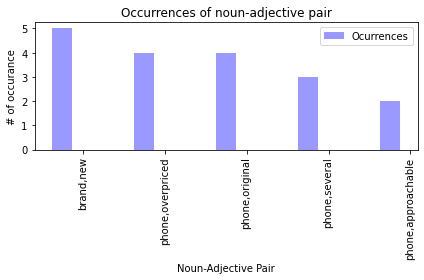

In [19]:
data=Counter(new_list).most_common(5)

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Noun-Adjective Pair')
plt.ylabel('# of occurance')
plt.title('Occurrences of noun-adjective pair')
plt.xticks(index + bar_width, legends_films)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

***Observations and remarks:***

The top 5 ranked pairs are different from the ones that we had identified, with the exception of the pair “phone, overpriced”. Amongst the top 5 ranked pairs, 3 of the pairs are illogical. They are “brand, new”, “phone, several”, “phone, approachable”. 

This is because when we perform a manual search on the <noun,adj> pairs, we are able to understand the context of respective words in the review and identify meaningful pairs respective to the product well based on its context. However, the computer does not recognize the context of the words. It first identifies words that are noun using POS tagging and pairs words located after the noun, that are identified as adjectives by the POS tagger, to the respective noun. Therefore, most of the top 5 frequently occurring pairs are illogical.

Another observation is that some words are misclassified by the POS tagger. For example, the word “brand” in “brand new” is misclassified as a noun instead of an adjective for brand new. This is understandable as the POS tagger only looks at the independent word and does not take into consideration of the context of the word. Therefore, this also explains the result of why the top 5 ranked pairs are different from the ones we had identified.

***Challenges and areas of improvement:***

A main challenge that we have is the handling of spelling errors. As previously mentioned in 2.3.2, we had tried using TextBlob to handle the error. However, it proved to be counter intuitive as TextBlob was not able to identify incorrectly spelled words and those that it correctly identified as incorrect was not able to be correctly corrected. Therefore, a possible solution to this problem would be build a personal dictionary on our own instead of using public libraries like TextBlob. This helps to achieve a more personalized dictionary that is tailored to the context, which in this case is iPhone reviews and hence more effective in handling spelling errors.
Another challenge would be the determining of adjectives, which could be more than one word. An example would be the word “very good”. Currently the algorithm only registers the word “good” and pairs it up with the respective noun. Therefore, a possible solution would be to also factor in bigrams, which are two-word sequence of words, in addition to unigrams in the classification of adjectives. 

Furthermore, the dataset used is too small. With a small dataset, it will be difficult for us to find out the key noun-adj pairs. This is because just by having the same noun-adj pairs to appear more than 2 times, it would already be in the top 5 ranking pairs. Hence, having a bigger dataset can help us identify key noun-adj pairs better.

# Part 3: Application

We have decided to develop a simple application to classify the iPhone reviews stated in Section 3.2 and determine whether they are positive, neutral and negative based on their sentiments. Our *target* values, which is the sentiment type of the review, is labelled as *0, 1 and 2* for *negative, neutral and positive* respectively.

We decided to use to libraries, TextBlob and VADER to compare the effectiveness in its determination of sentiment of our reviews. We specifically choose to use these two libraries instead of other machine learning algorithms such as logistic regression and support vector machines due to its advantage of not requiring training data. This is extremely critical as we have a very small dataset of only 30 rows and using a supervised machine learning model will most likely not be useful in determining sentiments as these models usually require large datasets to train and improve its respective machine learning model. 

In [20]:
#0 is negative, 1 is neutral, 2 is positive
def rating(number):
    rating=number[:1]
    rating=int(rating)
    if(rating == 2 or rating == 1 or rating ==0):
        return_rating= 0
    elif(rating is 3):
        return_rating= 1
    else:
        return_rating= 2
    return return_rating
    

data_iphone['Target']=data_iphone['Rating'].map(lambda s:rating(s)) 

In [21]:
data_iphone.head(20)

,Asin,UserName,Rating,Subject,ReviewDate,Review,replacedText,cleanText,Target
0,B07Z4681LQ,Jacky,1.0 out of 5 stars,Terrible Product,"Reviewed in the United States on June 9, 2020","This product is awful, it was cool for a few hours until the screen was completely unresponsive. Honestly I’ve bought refurbished phones before by Apple but these Amazon guys seem to really be dropping the ball. This is a terrible product and honestly now I just want my money back. Will not be purchasing any phones off Amazon ever again.","This phone is awful, phone was cool for a few hours until the screen was completely unresponsive. Honestly I’ve bought refurbished phones before by Apple but these Amazon guys seem to really be dropping the ball. This is a terrible phone and honestly now I just want my money back. Will not be purchasing any phones off Amazon ever again.",phone awful phone cool hours screen completely unresponsive honestly bought refurbished phones apple amazon guys seem really dropping ball terrible phone honestly want money back purchasing phones amazon ever,0
1,B07Z4681LQ,Amazon Customer,5.0 out of 5 stars,Good costumer service.,"Reviewed in the United States on January 18, 2020","While I had to return the phone since it did not work as expected. I found that their costumer service was very approachable, and understanding.","While I had to return the phone since phone did not work as expected. I found that their costumer service was very approachable, and understanding.",return phone since phone work expected found costumer service approachable understanding,2
2,B07Z4681LQ,Judith Runyon,4.0 out of 5 stars,Great product with short battery life!,"Reviewed in the United States on February 12, 2020",quality is very good overall.Batter life is not what it should be!,quality is very good overall.Batter life is not what phone should be!,quality good overall batter life phone,2
3,B07Z4681LQ,Dee B.,5.0 out of 5 stars,Pro max,"Reviewed in the United States on February 15, 2020",Love the color. Have not fully used as of yet. Still learning how to use.,Love the color. Have not fully used as of yet. Still learning how to use.,love color fully used yet still learning use,2
4,B07Z4681LQ,Lili,5.0 out of 5 stars,I got what i paid for,"Reviewed in the United States on August 21, 2020",2 months in... so far so good. Battery capacity was at 100% when I received it. It came with a protective screen on it. Upon taking it off for a more durable screen protector I noticed there were scratches. HMMM... wasn’t too happy about that. But I did save $$$ of dollars buying this renewed. I’ll take what I can get. Scratched are completely unnoticeable when protection screen is on. Woohoo!! Camera game has totally upgraded. 4K videos are poppin! I was able to send high quality interview videos and create great group project videos.,2 months in... so far so good. Battery capacity was at 100% when I received it. It came with a protective screen on it. Upon taking phone off for a more durable screen protector I noticed there were scratches. HMMM... wasn’t too happy about that. But I did save $$$ of dollars buying this renewed. I’ll take what I can get. Scratched are completely unnoticeable when protection screen is on. Woohoo!! Camera game has totally upgraded. 4K videos are poppin! I was able to send high quality interview videos and create great group project videos.,months far good battery capacity received came protective screen upon taking phone durable screen protector noticed scratches hmmm happy save dollars buying renewed take get scratched completely unnoticeable protection screen woohoo camera game totally upgraded videos poppin able send high quality interview videos create great group project videos,2
5,B07Z4681LQ,MyWifeN4Kidz,3.0 out of 5 stars,Not to happy.,"Reviewed in the United States on June 30, 2020",I’m mainly upset they took all the original accessories that come with the device especially at how much they are asking for. Could have gotten on

## Is the dataset balanced?

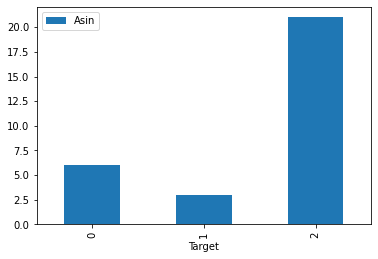

In [22]:
results=data_iphone.groupby('Target').count()['Asin']

results_1=results.to_frame()
results_1.plot.bar()

## TextBlob

We used TextBlob again to determine the sentiment of the reviews. TextBlob uses a sentiment lexicon, which consists of predefined words, to assign scores for each word. Using a weighted average, the scores are then averaged out to produce an overall sentence sentiment score. For each word, three scores: “polarity”, “subjectivity” and “intensity” are calculated. In this case, we will use the polarity attribute. The polarity attribute ranges from –1 to 1. 

| Polarity | Sentiment| 
| -- | -- |
| Polarity score < -0.05  | Negative | 
| -0.05 <= Polarity score <=0.05   | Neutral   | 
| Polarity score > 0.05   | Positive | 



In [23]:
def textblob(sentence):
    textblob_sentence=str(sentence)
    textblob_answer=TextBlob(textblob_sentence).sentiment.polarity
    if(textblob_answer>0.05):
        return_rating= 2
    elif(textblob_answer<-0.05):
        return_rating= 0
    else:
        return_rating= 1
    return return_rating
    

data_iphone['Text_Blob']=data_iphone['Review'].map(lambda s:textblob(s)) 

General function for the Confusion matrix that is used

In [24]:
def plot_confusion_matrix(y_true, y_pred,Title,
                          classes=[0, 1, 2],
                          normalize=False,
                          cmap=plt.cm.YlOrBr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (Adapted from scikit-learn docs).
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', origin='lower', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # Label with respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Set alignment of tick labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    plt.title(Title)

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return fig, ax

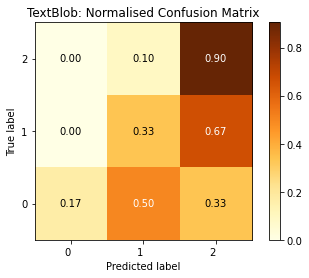

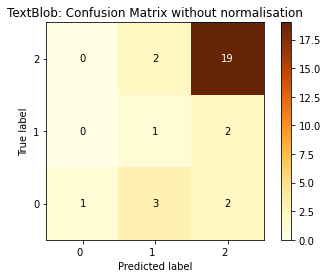

In [25]:
y_true=pd.Series(data_iphone['Target']).array
y_pred=pd.Series(data_iphone['Text_Blob']).array

textblob=[("TextBlob: Normalised Confusion Matrix", True),("TextBlob: Confusion Matrix without normalisation", False)]
for Title,normalise in textblob:
    disp=plot_confusion_matrix(y_true,y_pred,Title, classes=[0, 1, 2],normalize=normalise,cmap=plt.cm.YlOrBr)

***Observations and remarks:***

Even though it can predict positive and neutral sentiments well, it fails to predict the negative sentiments well. From the confusion matrix above, it is visible for the negative sentiment that it can only predict 1 out of 6 of the negative reviews correctly (17%). Moreover, it even predicted a negative review as a positive review.

In [26]:
acc = accuracy_score(y_true,y_pred)*100
f1 = f1_score(y_true,y_pred, average='macro')
print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

Accuracy: 70.0
Macro F1-score: 0.4571909571909572


Below is the negative review that is wrongly predicted to be a positive review:

In [27]:
data_iphone['Review'][23]

'I bought it brand new and the phone died after 4 months (we\'re talking about a phone thats worth more than a $1,000). Lost all the info and images. Took it to Apple, they "fixed" it and returned after several days. The fixed phone lasted only 2 months and started restarting non-stop. Will never buy an Apple product again. Read on the internet, there millions of people complaining about Apple products.'

A possible explanation could be due to the informal language of the negative review and the sarcasm that is found in the review. TextBlob, which is more tuned to determining sentiment in more formal texts, therefore predicts the above negative review to be a positive review

## VADER

VADER stands for Valence Aware Dictionary and sEntiment Reasoner. It is a exicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are labelled according to their semantic orientation as either positive or negative. 

We iterate through the rows of reviews and used the polarity_scores() method to obtain the polarity indices for each sentence. This method will return four attributes of each sentence, namely “Positive”, “Neutral”, “Negative” and “Compound”. The positive, neutral and negative scores represent the proportion of text in the review that falls in these categories and since these 3 attributes are a proportion of text, they add up to 1 which is a 100 percent.

 The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between –1 (most extreme negative) and +1 (most extreme positive). 
 
| Compound | Sentiment| 
| -- | -- |
| Compound score < -0.05  | Negative | 
| -0.05 <= Compound score <=0.05   | Neutral   | 
| Compound score > 0.05   | Positive | 


VADER analyses sentiments are primarily based on these few points (**How compound score is affected**):

1.	Punctuation
The use of exclamation mark (!) increases the magnitude of the intensity. For example, the “The food here is good!” is more intense than “The food here is good.” and the increase in the number of (!) increases the magnitude accordingly.
2.	Capitalization
Using upper case letters to emphasize a sentiment-relevant word in the presence of other non-capitalized words, increases the magnitude of the sentiment intensity. For example, “The food here is GREAT!” conveys more intensity than “The food here is great!”
3.	Degree modifiers
Degree modifiers include words such as “very” or “less”. They impact the sentiment intensity by either increasing or decreasing the intensity. For example, “The service here is extremely good” is more intense than “The service here is good”, whereas “The service here is marginally good” reduces the intensity.
4.	Conjunctions
The use of conjunctions like “but” signals a shift in sentiment polarity, with the sentiment of the text following the conjunction being dominant. For example, “The food here is great, but the service is horrible” has mixed sentiment, with the latter half dictating the overall rating.
5.	Preceding Trigrams 
By examining the trigram preceding a sentiment-laden lexical feature, we can catch nearly 90% of cases where negation flips the polarity of the text. A negated sentence would be “The food here isn’t really all that great.”

In [28]:
def VADER(sentence):
    VADER_sentence=str(sentence)
    VADER_analyser = SentimentIntensityAnalyzer()
    
    
    score=VADER_analyser.polarity_scores(VADER_sentence)
    VADER_answer=score['compound']
    if(VADER_answer>0.05):
        return_rating= 2
    elif(VADER_answer<-0.05):
        return_rating= 0
    else:
        return_rating= 1
    return return_rating
    

data_iphone['VADER']=data_iphone['Review'].map(lambda s:VADER(s)) 

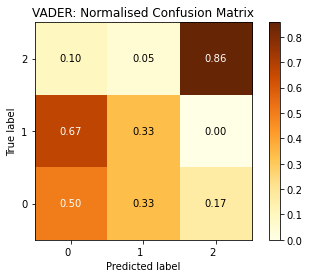

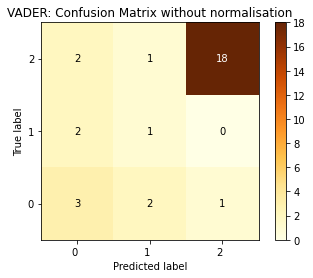

In [29]:
y_pred=pd.Series(data_iphone['VADER']).array
textblob=[("VADER: Normalised Confusion Matrix", True),("VADER: Confusion Matrix without normalisation", False)]
for Title,normalise in textblob:
    disp=plot_confusion_matrix(y_true,y_pred,Title, classes=[0, 1, 2],normalize=normalise,cmap=plt.cm.YlOrBr)

***Observations and remarks:***

VADER predictions more spread out compared to TextBlob. For example, for positive sentiment texts, it is wrongly misclassified as either neutral or positive, which is not present in TextBlob where positive sentiment texts have only been misclassified as neutral texts. The greater spread could be largely attributed to the fact that it assigns very low or very high compound scores to text that has a lot of capitalization, punctuation, repetition and emojis.
VADER is also able to predict the negative review stated in figure 8 correctly. This may be due to the fact that VADER is more tuned to informal text. For example, in the negative review, the customer emphasizes his dissatisfaction through the use of sarcasm by having words in brackets (e.g. Took it to apple, they “fixed” it) and having degree modifiers (e.g. Will never buy an apple product again). These points are taken into account by VADER.

In [30]:
acc = accuracy_score(y_true,y_pred)*100
f1 = f1_score(y_true,y_pred, average='macro')
print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

Accuracy: 73.33333333333333
Macro F1-score: 0.549084249084249


## Comparison between TextBlob and VADER

Since we are dealing with an imbalanced dataset, we decided to use macro-F1 score in addition to accuracy to determine effectiveness of the algorithm. The macro-F1 score is the harmonic mean of the macro-averaged precision and recall.
Precision measures the number of true positives out of the samples predicted as positives (TP+FP). It shows the probability for correct detection of positive class. In the other hand, recall measures the number of true positives out of the samples predicted as true positives and false negative (TP+FN). It shows how accurate the model can determine the class label of each sample data. Both precision and recall can be used to plot Precision-Recall Curve. This PR curve is recommended for highly skewed domains, which refers to the imbalanced dataset.
We will also be using macro-F1 to assess the quality of problems, that have multiple binary labels or multiple classes. 

Below shows the accuracy and macro-F1 score of both TextBlob and VADER:

| Classifier| Accuracy| Macro-F1| 
| -- | -- |-- |
| TextBlob  | 70% | 46% | 
| VADER  | 74%  | 55%  | 

VADER performs better than TextBlob in both accuracy and Macro-F1 score. This could stem from the fact that TextBlob is better suited for sentiments in social media texts which are informal whereas TextBlob is better suited for formal texts.

VADER can detect slangs and uses factors such as punctuation and capitalisation in its determination of sentiments. This proved to be more effective in respective to the context of our dataset which is online reviews and hence largely informal and contain a complete mix of variety of text. In contrast, TextBlob is built upon NTLK and returns 0 if the sentence does not contain any polarity in the NTLK training set. Therefore, this may be the disadvantages for online reviews where there may be spelling errors and slangs that the TextBlob algorithm could not understand. The combination of these two factors resulted in VADER performing better than TextBlob.

However, VADER also lacks in the fact that it only cares about individual words and completely ignores the context in which the word is used. For example, “the party was savage” will be negative when considered by any token-based algorithms. Therefore, even though VADER is better than TextBlob, it still not a very good way to determine sentiment in text due to this big limitation that it has.

## Improvements

The effectiveness of the application to correctly classify the sentiments of the text is largely limited by the unsupervised learning approach used. This is because even though unsupervised algorithms like TextBlob and VADER are easy to use especially in our case where there is a small number of data, it is quite generic due to its already built-in rules. A supervised approach is an evolutionary step that is better in helping us classify the sentiments of the text better.
Therefore, if there is a large dataset available, we can use a supervised learning approach such as logistic regression and support vector machines to better analyze the text and labelled data of iPhone reviews.